# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing Data

In [2]:
book_data = pd.read_csv('book.csv')
book_data.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


# Exploratory Data Analysis

In [3]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


# Data Cleaning

In [4]:
book_data.drop('Unnamed: 0', axis = 1, inplace= True)

In [5]:
bookclean=book_data.rename({'User.ID':'userid','Book.Title':'bookTitle','Book.Rating':'bookRating'},axis=1)
bookclean.head()

,userid,bookTitle,bookRating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


# Exploratory Data Analysis

###### Total Number of Users

In [6]:
bookclean['userid'].nunique()

2182

###### Number of Books rated by each user

In [7]:
bookclean['userid'].value_counts()

3757      523
162052    214
2276      212
4017      156
277427    150
         ... 
969         1
967         1
965         1
951         1
162129      1
Name: userid, Length: 2182, dtype: int64

###### Total Number of Books

In [8]:
bookclean['bookTitle'].nunique()

9659

###### Number of users read a book

In [9]:
bookclean['bookTitle'].value_counts()

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: bookTitle, Length: 9659, dtype: int64

###### Most Frequent Book and its readers

In [10]:
bookclean[bookclean['bookTitle'] == 'Fahrenheit 451']

,userid,bookTitle,bookRating
179,276875,Fahrenheit 451,2
2230,278633,Fahrenheit 451,7
5589,2442,Fahrenheit 451,10
7989,4049,Fahrenheit 451,8
8191,4207,Fahrenheit 451,8


###### Unique Ratings

In [11]:
bookclean['bookRating'].unique()

array([ 5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

###### Distribution of Books and ratings

In [12]:
bookclean['bookRating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: bookRating, dtype: int64

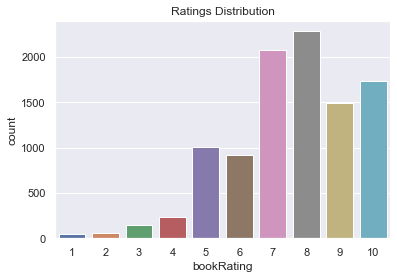

In [13]:
sns.countplot(x='bookRating',y=None, data = bookclean)
plt.title('Ratings Distribution')
plt.show()

# Collaborative Filtering using Cosine Similarity

In [14]:
books_reader=bookclean.pivot_table(index='userid',columns='bookTitle',values='bookRating')
books_reader.fillna(0, inplace=True)
books_reader.head()

bookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userid,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
reader_sim = cosine_similarity(books_reader.values)

In [17]:
reader_sim_df=pd.DataFrame(reader_sim)
reader_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
reader_sim_df.index=bookclean.userid.sort_values().unique()
reader_sim_df.columns=bookclean.userid.sort_values().unique()
reader_sim_df.iloc[0:5, 0:5]

,8,9,10,12,14
8,1.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0
14,0.0,0.0,0.0,0.0,1.0


In [19]:
np.fill_diagonal(reader_sim, 0)
reader_sim_df.iloc[0:5, 0:5]

,8,9,10,12,14
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0


# Reccommending Books using cosine similarity score

In [20]:
reader_sim_df.loc[4207,4049]

0.4536383816989942

In [21]:
reader_1=bookclean[bookclean['userid']==4049]
reader_2=bookclean[bookclean['userid']==4207]

In [22]:
pd.merge(reader_1,reader_2,on='bookTitle',how='outer').sort_values(by = 'bookRating_x', ascending=False).head()

,userid_x,bookTitle,bookRating_x,userid_y,bookRating_y
2,4049,Las mujeres en la historia de EspaÃ±a (Documento),9,NaN,NaN
3,4049,La rueda de la vida,9,NaN,NaN
1,4049,Fahrenheit 451,8,4207.0,8.0
0,4049,LA Actitud Mental Positiva: UN Camino Hacia El...,7,NaN,NaN
4,4049,Yo Estoy Bien Tu Estas Bien,6,NaN,NaN


#### These Books are highly rated by 4049. So, they are recommended to 4207.